We first install the required libraries

# Explanatory Data Analysis for Labeled Sales Data 
## Table of Contents
1. [Introduction](#1-introduction)
2. [Data Loading](#2-data-loading)
3. [Data Exploration](#data-exploration)
    - 3.1 [Summary Statistics](#summary-statistics)
    - 3.2 [Seasonality Analysis](#seasonality-analysis)
    - 3.3 [Customer Segmentation Analysis](#customer-segment-analysis)
    - 3.4 [Analysis by Product Group](#product-group)
    - 3.5 [Analysis by Customer Country](#cust-country)


10. [Conclusion](#conclusion)
11. [References](#references)

## 1. Introduction 

## 2. Data Loading 

In [2]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [3]:
df22 = pd.read_csv('intermediate-data\labeled_data2022.csv')
df21 = pd.read_csv('intermediate-data\labeled_data2021.csv')
df23 = pd.read_csv('intermediate-data\labeled_data2023.csv')

In [4]:
def calculate_and_visualize_percentage_consecutive_periods(data_file, period_months):
    # Load your data
    data = pd.read_csv(data_file)

    # Convert the 'order_date' column to datetime
    data['order_date'] = pd.to_datetime(data['order_date'])

    # Calculate the minimum and maximum order dates
    min_order_date = data['order_date'].min()
    max_order_date = data['order_date'].max()

    # Calculate the churn cutoff dates for each n-month period
    churn_cutoff_dates = pd.date_range(start=min_order_date, end=max_order_date, freq=f'{period_months}M')

    # Initialize a set to store customer IDs with consecutive orders
    consecutive_customers = set()

    # Identify customers who placed orders in consecutive n-month periods
    for i in range(len(churn_cutoff_dates) - 1):
        start_date = churn_cutoff_dates[i]
        end_date = churn_cutoff_dates[i + 1]

        current_period_customers = data[(data['order_date'] >= start_date) & (data['order_date'] < end_date + pd.DateOffset(days=1))]['Customer_Id'].unique()
        next_period_customers = data[(data['order_date'] >= end_date) & (data['order_date'] < end_date + pd.DateOffset(months=period_months) + pd.DateOffset(days=1))]['Customer_Id'].unique()

        consecutive_period_customers = set(current_period_customers) & set(next_period_customers)
        consecutive_customers.update(consecutive_period_customers)

    # Calculate the percentage of customers who placed orders in consecutive n-month periods
    total_customers = data['Customer_Id'].nunique()
    percentage_placed_order_consecutive_periods = (len(consecutive_customers) / total_customers) * 100

    # Print the result
    print(f"Percentage of customers who placed orders in consecutive {period_months}-month periods: {percentage_placed_order_consecutive_periods:.2f}%")
    return percentage_placed_order_consecutive_periods



## 3. Data Exploration 

### 3.1 Summary Statistics

In [5]:
def remove_outliers_z(data, columns, threshold=1):
    """
    Remove outliers from the dataset using the Z-score method.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to check for outliers.
        threshold (float): Threshold for identifying outliers in terms of Z-score. Default is 3.
        
    Returns:
        pd.DataFrame: DataFrame with outliers removed.
    """
    filtered_data = data.copy()
    
    for column in columns:
        z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
        filtered_data = filtered_data[z_scores <= threshold]
    
    return filtered_data

In [6]:
df21 = remove_outliers_z(df21,['Frequency','Monetary'],3)
df22 = remove_outliers_z(df22,['Frequency','Monetary'],3)
df23 = remove_outliers_z(df23,['Frequency','Monetary'],3)


C:\Users\elif.yozkan\AppData\Local\Temp\ipykernel_8652\925278671.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[z_scores <= threshold]
C:\Users\elif.yozkan\AppData\Local\Temp\ipykernel_8652\925278671.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[z_scores <= threshold]
C:\Users\elif.yozkan\AppData\Local\Temp\ipykernel_8652\925278671.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_data = filtered_data[z_scores <= threshold]


In [7]:
def count_plot(variable,df,hue = None):
  '''
  function to generate count plots for categorical variables.
  variable : is the variable to be plotted
  hue : we use hue to plot our variable with respect to another categorical variable
  df : the dataframe

  '''
  sns.set(style="darkgrid")  # Optional: Set the plot style
  plt.figure(figsize=(5, 5))  # Optional: Set the figure size

  sns.countplot(x=df[variable], data=df,hue = hue )

  plt.title('Countplot for ' + variable)
  plt.xlabel(variable)
  plt.ylabel('Count')

  plt.xticks(rotation=90)  # Optional: Rotate x-axis labels for better readability

  plt.show()

In [8]:
def dist_plot(variable,hue,df):
  '''
  function to generate distribution plots for the numerical variables.

  variable : variable to be plotted
  hue : we use hue to plot our variable with respect to another categorical variable
  df : the dataframe which we want to take as reference

  '''
  sns.set(style="whitegrid")  # Optional: Set the plot style
  plt.figure(figsize=(10, 6))  # Optional: Set the figure size

  sns.displot(data=df, x=variable, hue= hue , kde=True)

  plt.title('Histogram of' + variable)
  plt.xlabel(variable)
  plt.ylabel('Count')

  plt.legend(title= hue)  # Optional: Set legend title

  plt.show()

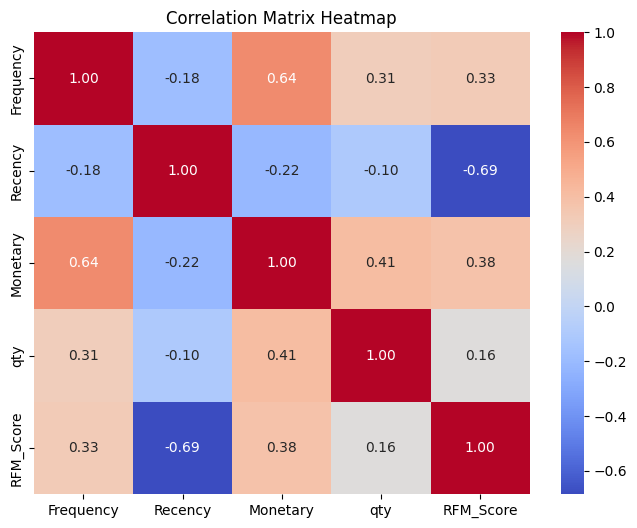

In [9]:
correlation_matrix = df23[['Frequency', 'Recency', 'Monetary', 'qty',"RFM_Score"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

- As expected, we have a lower proportion of customers which are labeled as "churning" customers. To tackle this imbalance in the training process, we need to apply oversampling methods such as SMOTE. 

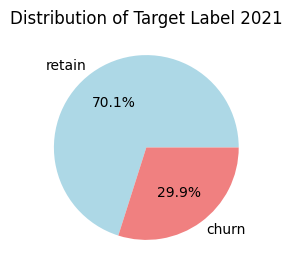

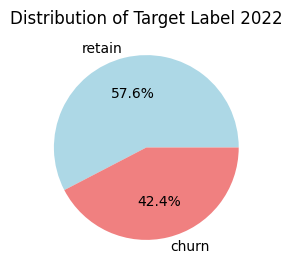

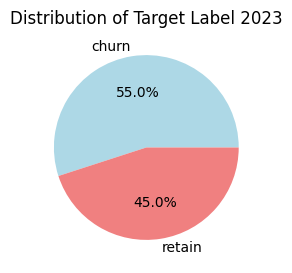

In [10]:
# Plotting the distribution of the target label using a pie chart
df_years = [df21,df22,df23]
start = 2021
for year in df_years:
    target_counts = year['Label'].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral','lightgreen'])
    plt.title('Distribution of Target Label ' + str(start))
    start +=1
    plt.show()

In the swarm plots, demonstrating the differences of Frequency, Recency and Monetary with respect to each class label, we observe that although some of the customers with lower frequency, monetary or quantity of purchase were labeled as retain, in the overall picture, we see that they have higher values for each respective attributes. The lower data points being labeled as retain is actually a positive sign, it tells us that only one attribute being low for a data point is not enough for it to be labeled as churn. The same thing is also valid for Recency. Although the overall recency is higher in churn class (older activity), we still have some data points which have relatively older latest activity.  

In [12]:
import scipy.stats as stats

def non_parametric_test(*groups):
    num_groups = len(groups)

    if num_groups == 2:
        # Two groups: Use Mann-Whitney U test
        statistic, p_value = stats.mannwhitneyu(*groups)
    elif num_groups > 2:
        # More than two groups: Use Kruskal-Wallis H test
        statistic, p_value = stats.kruskal(*groups)
    else:
        raise ValueError("At least two groups are required for comparison.")

    return statistic, p_value




# Filter churned and retained customers
churned_customers = df23[df23['Label'] == 'churn']
retained_customers = df23[df23['Label'] == 'retain']

# Perform non-parametric tests for 'monetary', 'frequency', 'recency', and 'quantity' columns
columns_to_compare = ['Monetary', 'Frequency', 'Recency', 'qty','RFM_Score']

for column in columns_to_compare:
    statistic, p_value = non_parametric_test(churned_customers[column], retained_customers[column])
    print(f"Column: {column}")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    print()


Column: Monetary
Statistic: 6701484.0
P-value: 1.1525477750159802e-187

Column: Frequency
Statistic: 7343680.5
P-value: 4.342875511369909e-130

Column: Recency
Statistic: 19721896.0
P-value: 0.0

Column: qty
Statistic: 7340840.5
P-value: 4.461375535266559e-129

Column: RFM_Score
Statistic: 3850080.0
P-value: 0.0



In [13]:
# Create a violin plot using seaborn
def violin_plot(df):
    plt.figure(figsize=(3, 3))
    sns.set(style="whitegrid")
    sns.violinplot(x="Label", y="Recency", data=df, inner="quartile")
    plt.title('Recency by Churn Label')
    plt.xlabel('Churn Label')
    plt.ylabel('Recency')
    plt.show()

    plt.figure(figsize=(3, 3))
    sns.set(style="whitegrid")
    sns.violinplot(x="Label", y="Frequency", data=df, inner="quartile")
    plt.title('Frequency by Churn Label')
    plt.xlabel('Churn Label')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(3, 3))
    sns.set(style="whitegrid")
    sns.violinplot(x="Label", y="Monetary", data=df, inner="quartile")
    plt.title('Monetary by Churn Label')
    plt.xlabel('Churn Label')
    plt.ylabel('Monetary')
    plt.show()

    plt.figure(figsize=(3, 3))
    sns.set(style="whitegrid")
    sns.violinplot(x="Label", y="RFM_Score", data=df, inner="quartile")
    plt.title('RFM Score by Churn Label')
    plt.xlabel('Churn Label')
    plt.ylabel('Monetary')
    plt.show()


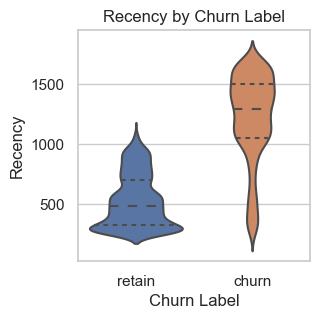

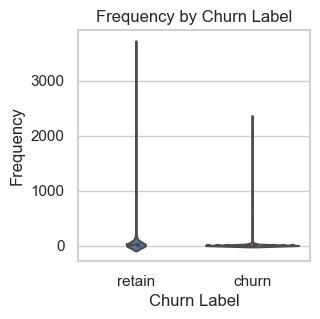

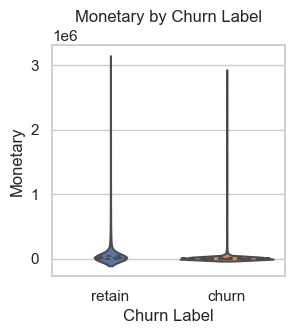

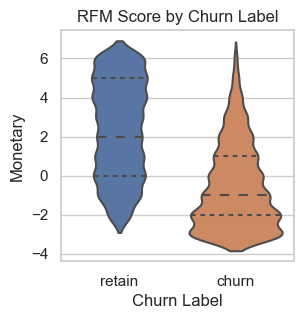

In [15]:
violin_plot(df22)

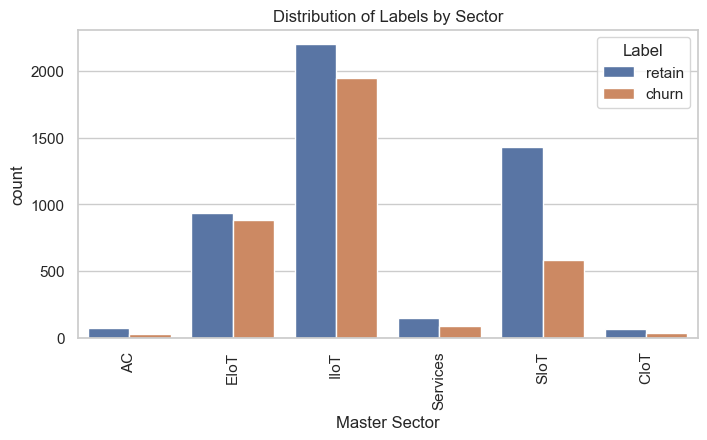

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.countplot(data=df22, x='Master Sector', hue='Label')
plt.xticks(rotation=90)
plt.title('Distribution of Labels by Sector')
plt.show()

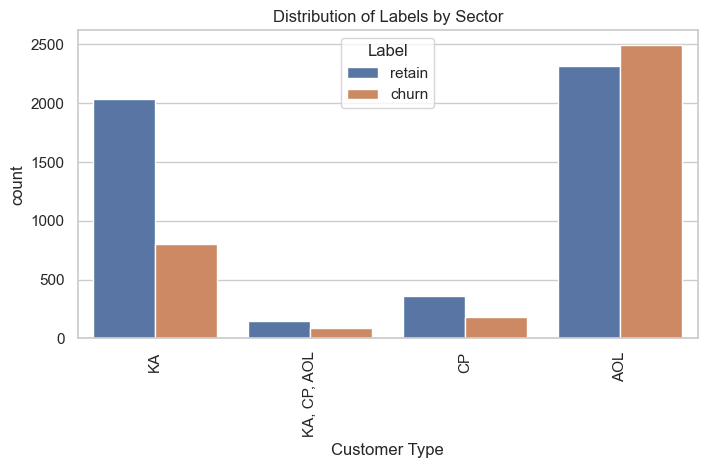

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(8, 4))

sns.countplot(data=df22, x='Customer Type', hue='Label')
plt.xticks(rotation=90)
plt.title('Distribution of Labels by Sector')
plt.show()

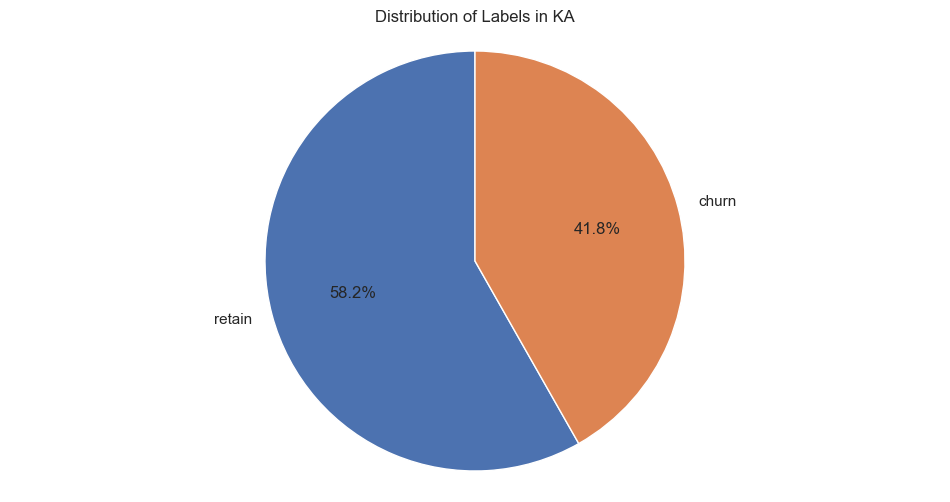

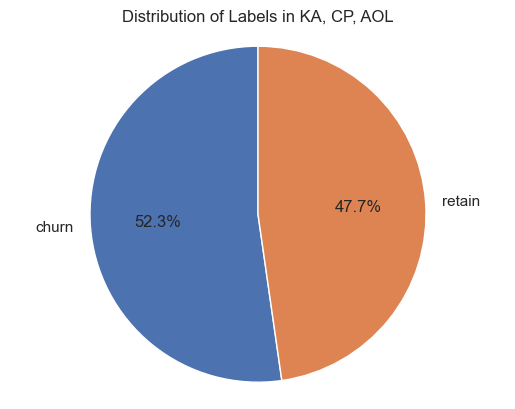

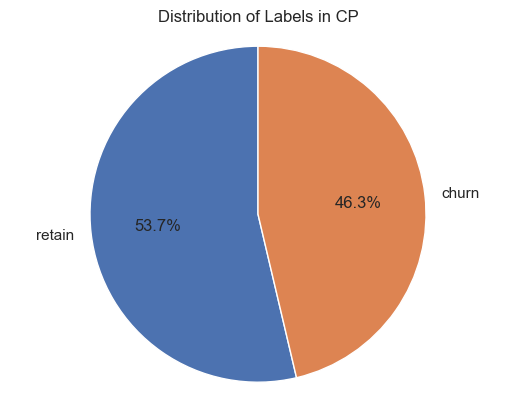

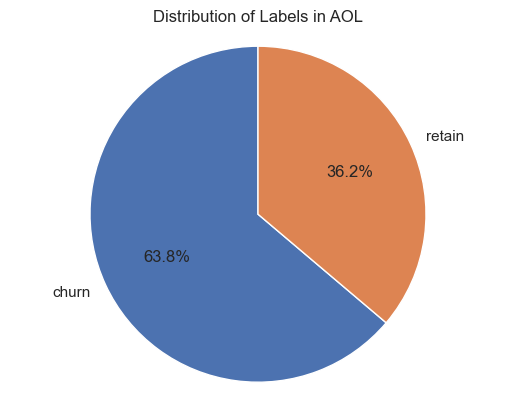

In [21]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(12, 6))

sectors = df23['Customer Type'].unique()
for sector in sectors:
    sector_data = df23[df23['Customer Type'] == sector]
    labels = sector_data['Label'].value_counts()
    plt.pie(labels, labels=labels.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Distribution of Labels in {sector}')
    plt.show()

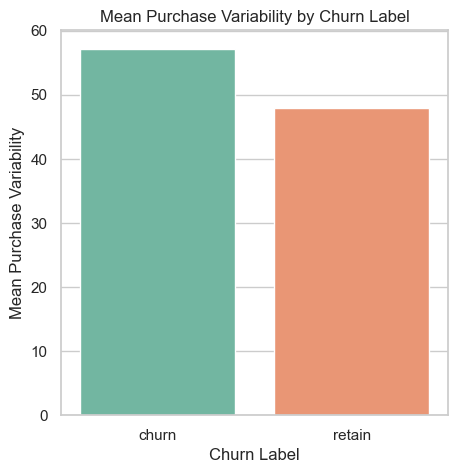

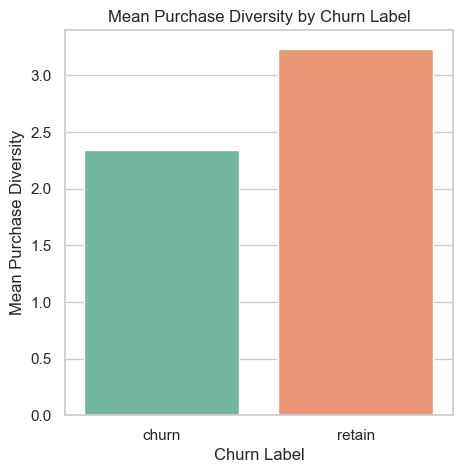

In [24]:
# Calculate the mean of Purchase Variability and Purchase Diversity for both churned and retained customers
mean_data = df23.groupby('Label')[['Purchase_Variability','Purchase_Diversity']].mean().reset_index()

# Create bar plots for mean Purchase Variability
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x="Label", y="Purchase_Variability", data=mean_data, palette="Set2")
plt.title('Mean Purchase Variability by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Mean Purchase Variability')
plt.show()

# Create bar plots for mean Purchase Diversity
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x="Label", y="Purchase_Diversity", data=mean_data, palette="Set2")
plt.title('Mean Purchase Diversity by Churn Label')
plt.xlabel('Churn Label')
plt.ylabel('Mean Purchase Diversity')
plt.show()

To see wheather the differences with respect to our target label are statistically significant, we apply a non-parametric test, namely, Mann-Whitney U test. It is an appropriate test for our case since we have an imbalanced dataset. The results of the statistical test indicate that only the differences between RFM_Score is statistically significant with p value less than 0.05, which again contribute to the fact that none of the separate attributes dominate the decision of labeling a customer as a churning customer. 

### 3.2 Seasonality Analysis

- When we look at the overall Sales Trend over time with respect to the Monetary value, we see that the monetary value was stable between 2019-2020, abd it shows a greatly increasing pattern between the years 2021 and 2022, although there are some peaks and drops. These extreme values could be because of the outlier customers with high purchasing volume. After a decrease in the last quarter of 2022, we again observe an increasing trend in 2023. 

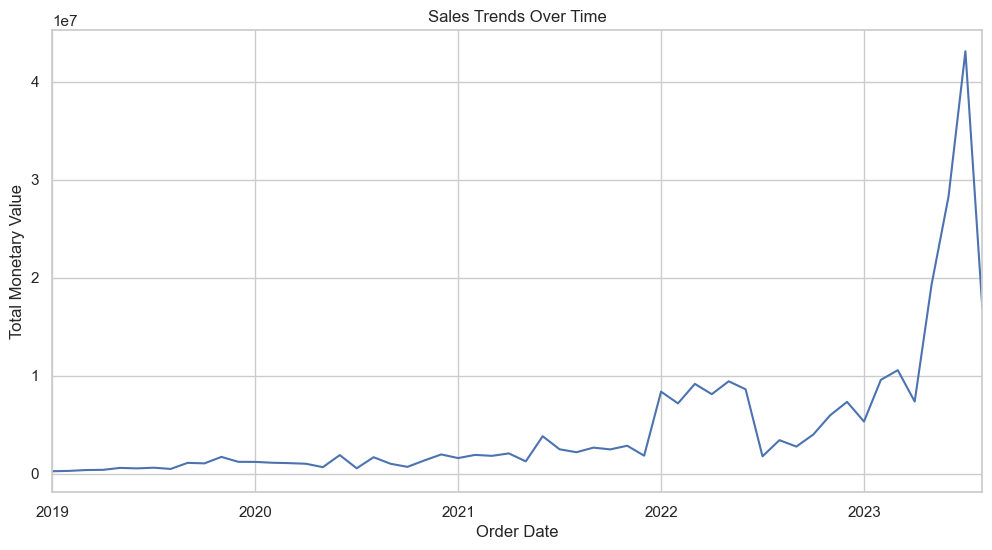

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


ts_df = df23.copy()
# Convert the 'order date' column to a datetime data type if it's not already in datetime format
ts_df['order_date'] = pd.to_datetime(ts_df['order_date'])

# Set 'order_date' as the DataFrame index for time series analysis
ts_df.set_index('order_date', inplace=True)

# Sales trends over time
plt.figure(figsize=(12, 6))
ts_df['Monetary'].resample('M').sum().plot()  # Resample to daily frequency and plot total monetary value
plt.xlabel('Order Date')
plt.ylabel('Total Monetary Value')
plt.title('Sales Trends Over Time')
plt.show()



- We can see from the plotted results of the Sales Monetary Change on a Monthly basis, the overall tendency is a increase in average monetary value in the late Q1 and early Q2 for each year. However this pattern is more obvious for years 2023,2022 and 2021. Another observable pattern is that the average monetary value tends to decrease in the last quarter for each year, however we should also keep in mind that it is generally lower for years 2019 and 2020 anyway. 
- As for the frequency we observe that in years 2022 and 2023 the overall frequency of purchase is higher when compared to years 2019-20 and 21. We see that although the frequency is quite stable for years 2019-2020 and 2021.As for the years with overall high frequency, we observe a decay towards the summer. 

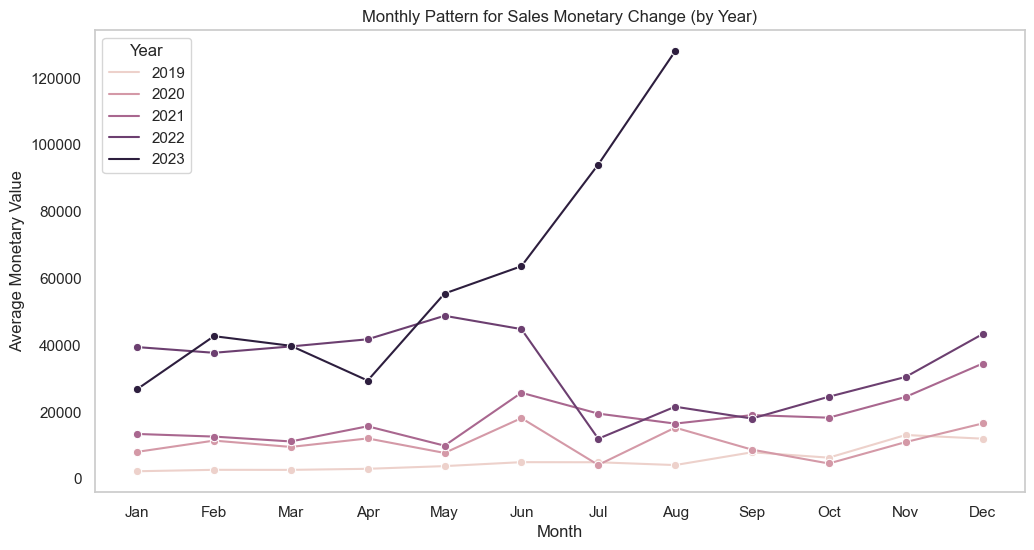

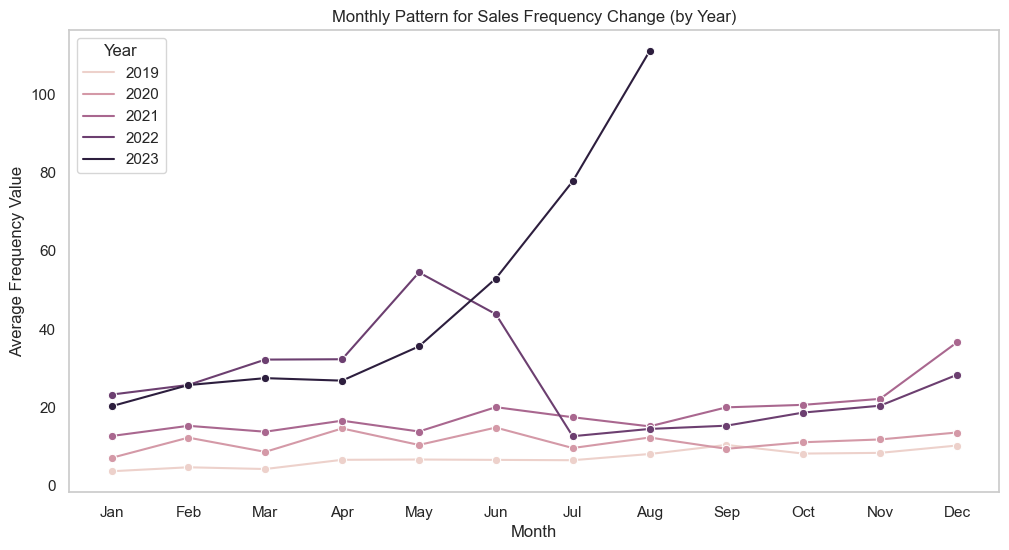

In [ ]:

# Convert 'order_date' column to datetime if it's not already
df23['order_date'] = pd.to_datetime(df23['order_date'])

# Extract the year and month from the 'order_date' column
df23['year'] = df23['order_date'].dt.year
df23['month'] = df23['order_date'].dt.month

# Group by year and month and calculate the mean monetary and frequency for each month and year
monthly_metrics = df23.groupby(['year', 'month']).agg({'Monetary': 'mean', 'Frequency': 'mean'}).reset_index()

# Plot the monthly pattern for sales monetary and frequency change with separate lines for each year
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_metrics, x='month', y='Monetary', hue='year', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Monetary Value')
plt.title('Monthly Pattern for Sales Monetary Change (by Year)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_metrics, x='month', y='Frequency', hue='year', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Frequency Value')
plt.title('Monthly Pattern for Sales Frequency Change (by Year)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', loc='upper left')
plt.grid()
plt.show()

In the plotted graph of Frequency of Orders over time, we again see a similar trend, between the years 2021 and 2022 we see a more frequent purchase activity, although for 2023, there is not enough information as we have data until May only. 

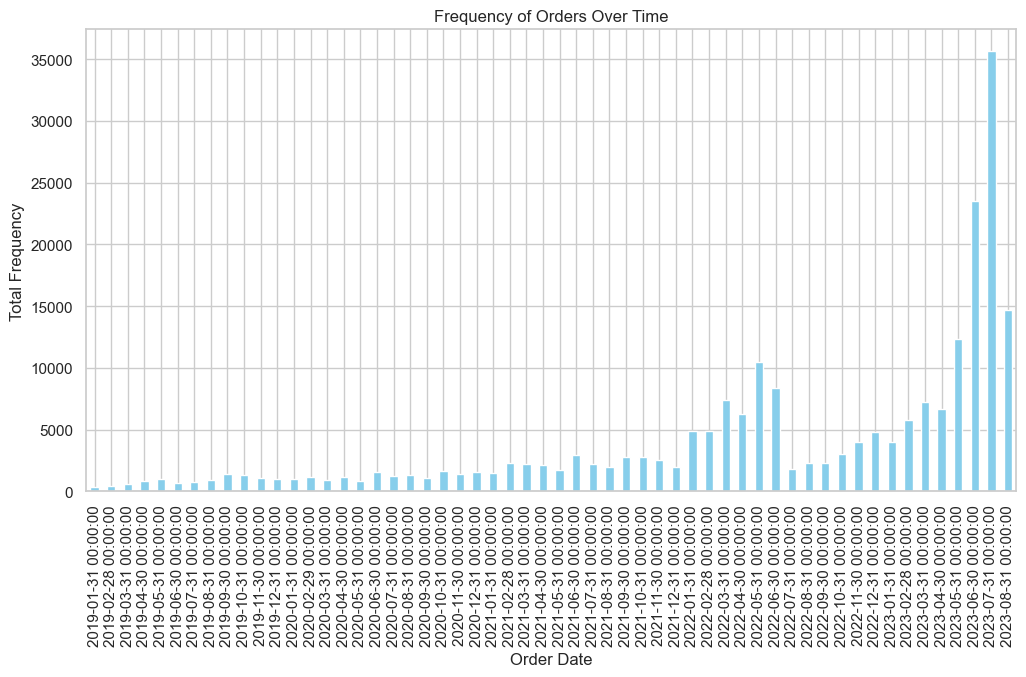

In [ ]:
# Frequency of orders over time
plt.figure(figsize=(12, 6))
ts_df['Frequency'].resample('M').sum().plot(kind='bar', color='skyblue')  # Resample to monthly frequency and plot total order counts
plt.xlabel('Order Date')
plt.ylabel('Total Frequency')
plt.title('Frequency of Orders Over Time')
plt.show()

In the line plot below, we see that, the churn rate was the highest in quarters 1 and 4 for year 2019. For 2020, it was higher in quarters 1 and 2, similarly in Q1 for 2021 and Q1 and Q2 for 2022. This could give us an insight on critical periods in which the churn rate might be higher, i.e ciritcal months that a customer is willing to stop purchasing from our company. 

In [ ]:

def box_plot(variable, hue, data):
  '''
  function to generate violin plots for the numerical variables.

  variable : variable to be plotted
  hue : we use hue to plot our variable with respect to another categorical variable
  df : the dataframe which we want to take as reference

  '''
  # Create the box plot
  sns.set(style="whitegrid")  # Optional: Set the plot style
  plt.figure(figsize=(10, 6))  # Optional: Set the figure size

  sns.violinplot(data=data, x= hue, y=variable)

  plt.title('Box Plot for ' + variable)
  plt.xlabel(hue)
  plt.ylabel(variable)

  plt.xticks(rotation=90)

  plt.show()

## 3.3 Customer Segment Analysis

### In this part, we analyse the customer segment (cluster) information to inspect the characteristics of customers in each customer segment/cluster. 

In the above visualization, we see that the cluster with the highest churn rate is the Cluster 1, which may indicate a potential high-risk customer segment. If we look at the statistics, the customer Cluster 1 seems to have a larger mean Recency,which means the customers within cluster 1 tend to have an older latest activity. 

In [ ]:

# Calculate the mean or median values for each feature within each cluster
cluster_characteristics = df.groupby('Cluster').agg({
    'Frequency': 'mean',  # Replace 'frequency' with the name of your frequency column
    'Recency': 'mean',    # Replace 'recency' with the name of your recency column
    'Monetary': 'mean',   # Replace 'monetary' with the name of your monetary column
    # Add more features as needed
}).reset_index()

# Optional: Rename the columns for better readability
cluster_characteristics = cluster_characteristics.rename(columns={
    'Frequency': 'Mean_Frequency',
    'Recency': 'Mean_Recency',
    'Monetary': 'Mean_Monetary',
    # Add more renaming as needed
})

# Display the cluster characteristics DataFrame
print(cluster_characteristics)


   Cluster  Mean_Frequency  Mean_Recency  Mean_Monetary
0        0       17.969514    823.755489   18254.682334
1        1      327.722054    377.779456  491607.250865


If we have a look at the box plots of churn rate with respect to each separate attribute we again pbserve that Recency and RFM_Score play a significant role here; the customer clusters -1 and 2 have a higher overall RFM_Score, which is sensible when we compare with the statiscal summary. 

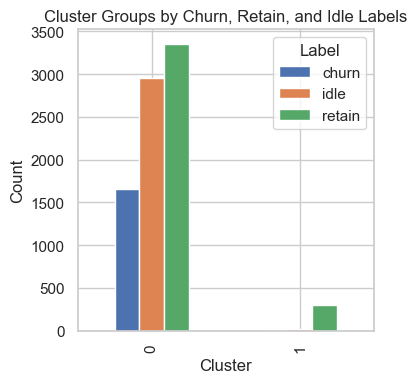

In [ ]:

# Create a pivot table with counts
pivot_table = df.pivot_table(index='Cluster', columns='Label', aggfunc='size', fill_value=0)

# Plot a grouped bar chart
ax = pivot_table.plot(kind='bar', figsize=(4, 4))

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Groups by Churn, Retain, and Idle Labels')
plt.legend(title='Label')

plt.tight_layout()
plt.show()


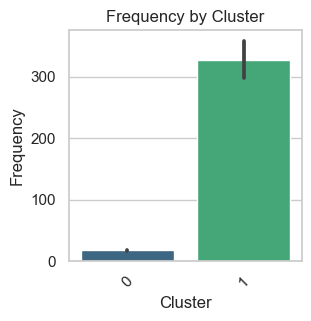

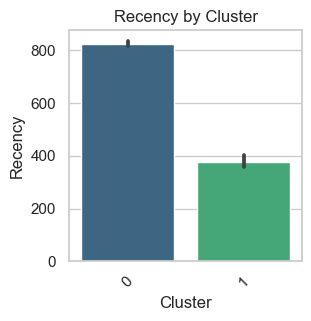

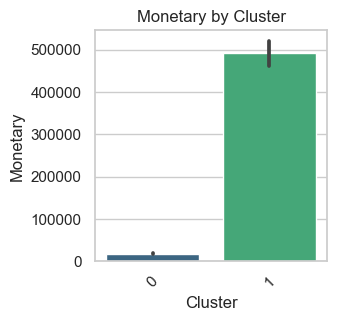

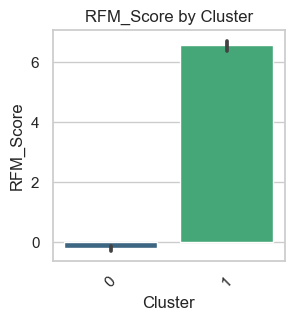

In [ ]:

# Create bar plots for each feature across clusters
features_to_visualize = ['Frequency', 'Recency', 'Monetary','RFM_Score']  # Add more features as needed

for feature in features_to_visualize:
    plt.figure(figsize=(3, 3))
    sns.barplot(data=df, x='Cluster', y=feature, palette='viridis')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'{feature} by Cluster')
    plt.xticks(rotation=45)
    plt.show()

## Inspect the Data with respect to Master Sector

In [25]:
by_product = df22.groupby('Master Sector').size()
print(by_product)

Master Sector
AC            96
CIoT         100
EIoT        1814
IIoT        4154
SIoT        2020
Services     241
dtype: int64


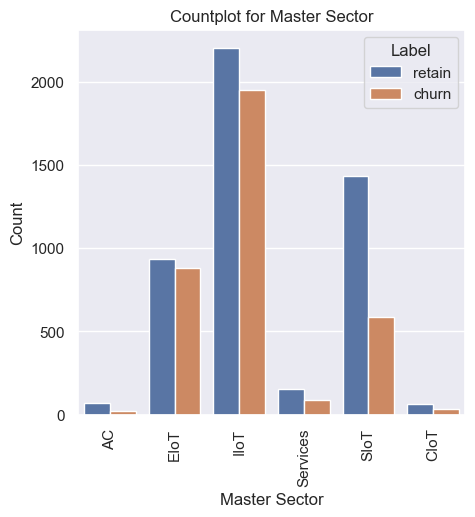

In [26]:
count_plot('Master Sector', df22, hue= 'Label')

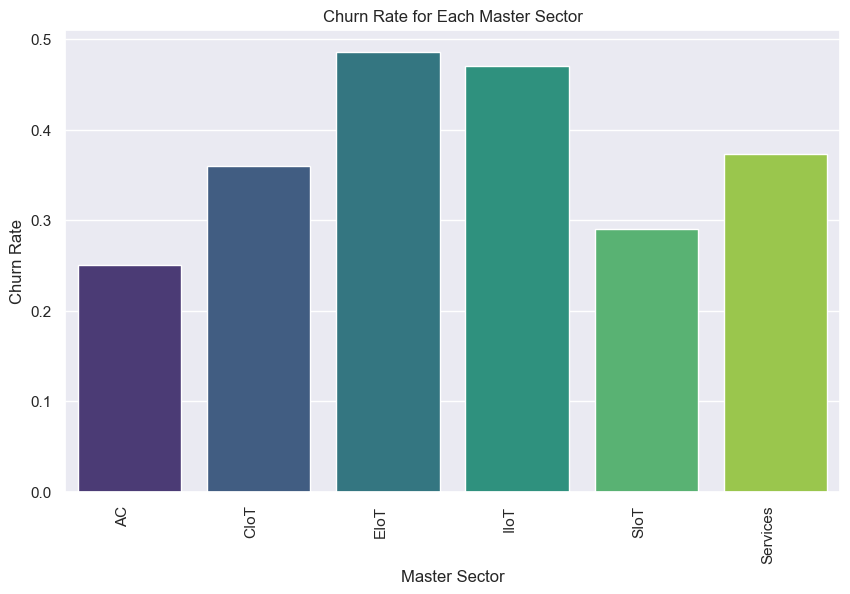

In [27]:
# Calculate the churn rate for each product group
product_group_churn_rate = df22.groupby('Master Sector')['Label'].value_counts(normalize=True).unstack().fillna(0)

# Sort the product groups by total churn count (retained + churned) in descending order
product_group_churn_rate['Total_Churn_Count'] = product_group_churn_rate['churn'] + product_group_churn_rate['retain']
product_group_churn_rate = product_group_churn_rate.sort_values(by='Total_Churn_Count', ascending=False)

# Plot the churn rate for each product group using a count plot
plt.figure(figsize=(10, 6))
sns.barplot(data=product_group_churn_rate, x=product_group_churn_rate.index, y='churn', palette='viridis')
plt.xlabel('Master Sector')
plt.ylabel('Churn Rate')
plt.title('Churn Rate for Each Master Sector')
plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
mean_price_by_product = df22.groupby('Master Sector')['Monetary'].mean()
print(mean_price_by_product)

egroup
ACG                                              1.248255e+06
Advantech Global Services                        1.429452e+05
Allied Procurement Services                      1.015089e+05
Automation System & Solution                     1.125111e+04
Cloud-IoT                                        1.133442e+05
Control & I/O System                             1.392402e+03
Device & Connectivity                            5.398883e+03
EIOT Sector Business                             1.821845e+06
Embedded Computing Group                         4.541863e+05
Embedded-IoT                                     3.180275e+04
Industrial Automation                            4.413852e+04
Industrial Cloud & Video                         3.174891e+05
Industrial Connectivity & Wireless               1.697709e+05
Industrial Peripheral & Software Distribution    3.678161e+05
Intelligent System                               2.870024e+05
Service-IoT                                      1.204045e+05
V

In [28]:
mean_qty_by_product = df22.groupby('Master Sector')['qty'].sum()
print(mean_qty_by_product)

Master Sector
AC          1.436786e+05
CIoT        2.549536e+04
EIoT        1.473240e+06
IIoT        1.241372e+06
SIoT        4.671573e+05
Services    1.293000e+03
Name: qty, dtype: float64


c:\Users\elif.yozkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

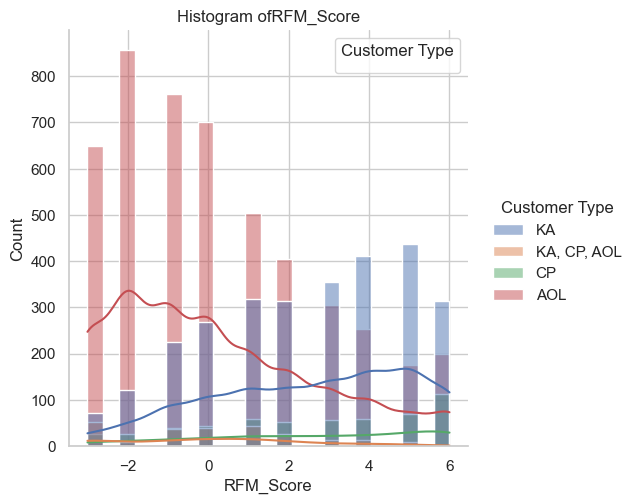

In [35]:
dist_plot('RFM_Score', 'Customer Type', df22)

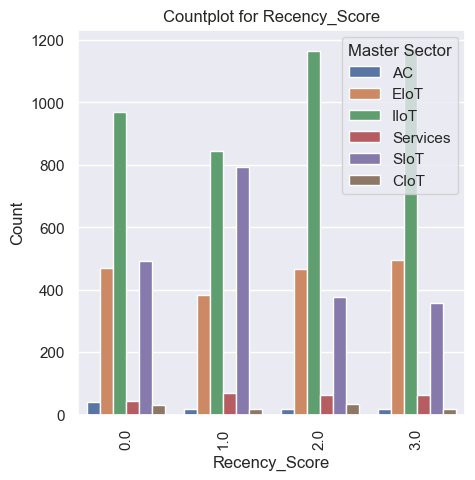

In [31]:
count_plot('Recency_Score', df22, hue = "Master Sector")

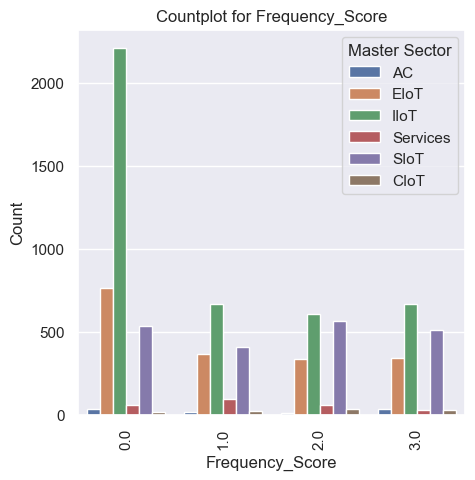

In [32]:
count_plot('Frequency_Score', df22, hue = "Master Sector")

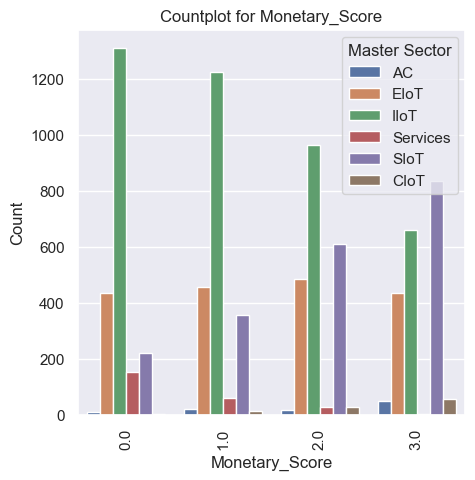

In [33]:
count_plot('Monetary_Score', df22, hue = "Master Sector")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

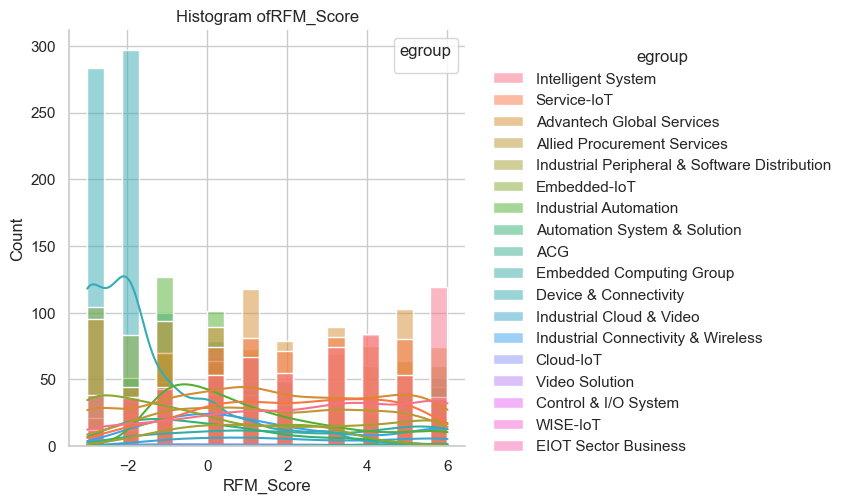

In [ ]:
dist_plot('RFM_Score','egroup',filtered_data)

In [ ]:
df.describe()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,qty,Cluster,Year,Quarter
count,9259.000000,9259.000000,9.259000e+03,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000
mean,664.112755,88.742305,1.461869e+05,1.498974,1.160492,1.499946,1.161465,944.199857,-0.023005,2021.327573,2.341614
std,514.731622,1274.761633,1.079786e+06,1.118046,1.173329,1.118143,2.766760,9424.883799,0.154188,1.432407,1.053673
min,3.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,-3.000000,0.000000,-1.000000,2019.000000,1.000000
25%,176.000000,2.000000,6.298400e+02,0.000000,0.000000,0.500000,-1.000000,2.000000,0.000000,2020.000000,1.000000
50%,554.000000,7.000000,2.899990e+03,1.000000,1.000000,1.000000,1.000000,14.000000,0.000000,2022.000000,2.000000
75%,1089.000000,24.000000,2.235498e+04,2.000000,2.000000,2.500000,3.000000,97.000000,0.000000,2023.000000,3.000000
max,1679.000000,111028.000000,4.004637e+07,3.000000,3.000000,3.000000,6.000000,483565.000000,1.000000,2023.000000,4.000000


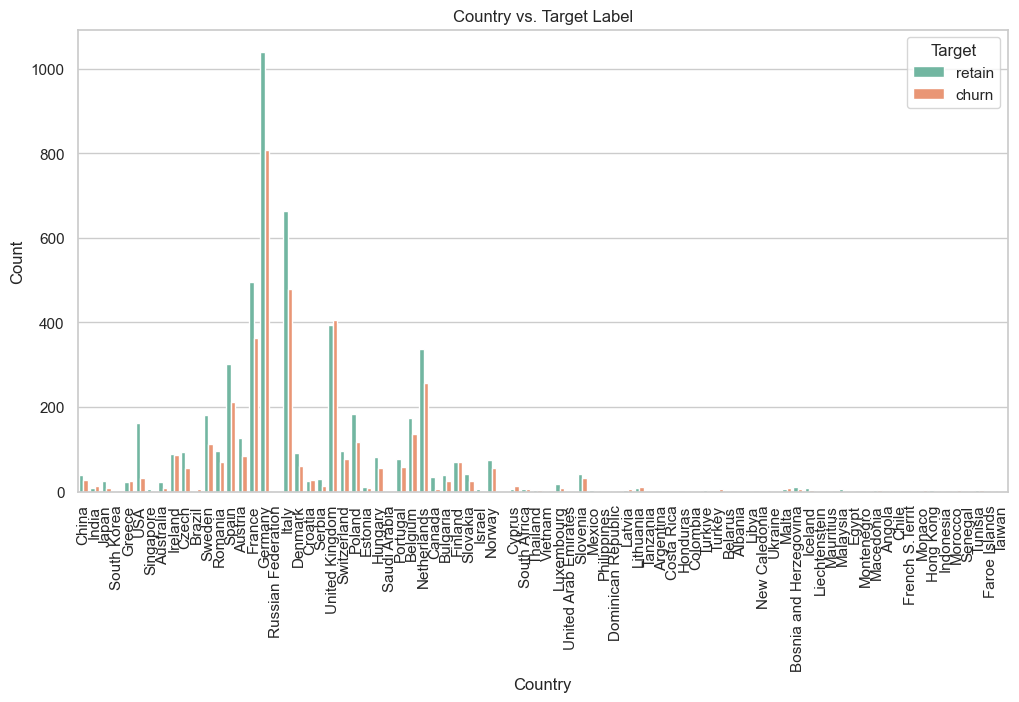

In [ ]:
# Bar plot showing the relationship between Country and Target Label
plt.figure(figsize=(12, 6))
sns.countplot(x='cust_country', hue='Label', data=df, palette='Set2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country vs. Target Label')
plt.xticks(rotation=90)
plt.legend(title='Target', labels=['retain', 'churn'])
plt.show()

In [ ]:
# Calculate the churn rate for each country
country_churn_rate = df.groupby('cust_country')['Label'].value_counts(normalize=True).unstack().fillna(0)

# Create the choropleth map
fig = px.choropleth(country_churn_rate,
                    locations=country_churn_rate.index,
                    locationmode='country names',
                    color='churn',
                    hover_name=country_churn_rate.index,
                    hover_data={'churn': ':.2f'},
                    color_continuous_scale='Viridis',
                    projection='natural earth')

# Update the map layout
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")

# Set the map title
fig.update_layout(title_text='Churn Rate by Country')

# Show the map
fig.show()

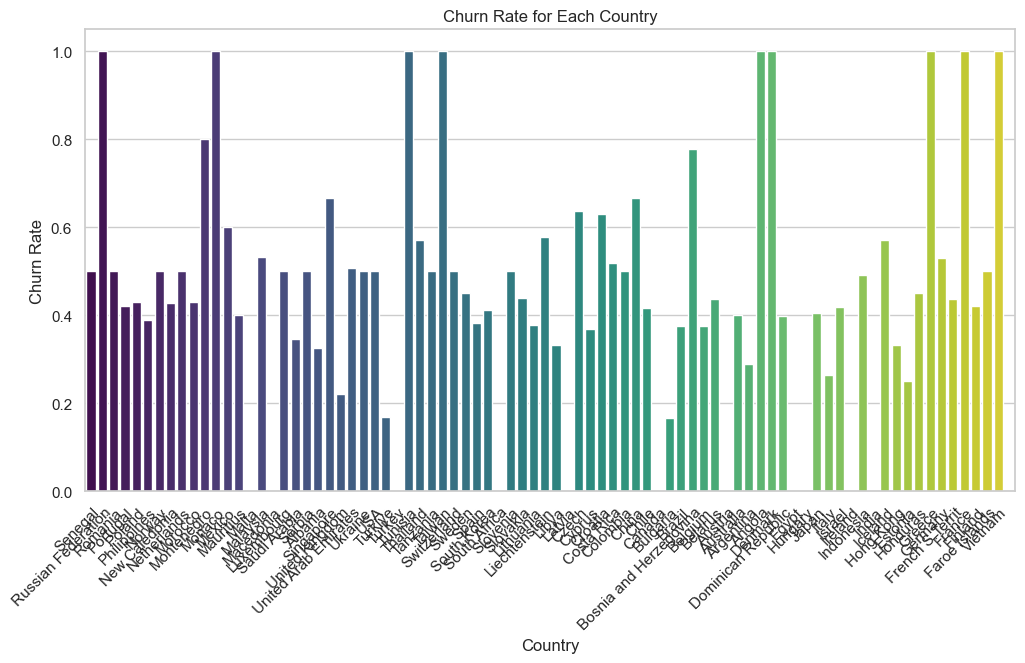

In [ ]:
# Calculate the churn rate for each country
country_churn_rate = df.groupby('cust_country')['Label'].value_counts(normalize=True).unstack().fillna(0)

# Sort the countries by total churn count (retained + churned) in descending order
country_churn_rate['Total_Churn_Count'] = country_churn_rate['churn'] + country_churn_rate['retain']
country_churn_rate = country_churn_rate.sort_values(by='Total_Churn_Count', ascending=False)

# Plot the churn rate for each country using a count plot
plt.figure(figsize=(12, 6))
sns.barplot(data=country_churn_rate, x=country_churn_rate.index, y='churn', palette='viridis')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.title('Churn Rate for Each Country')
plt.xticks(rotation=45, ha='right')
plt.show()